In [1]:
import TurbPy as tb
from TurbPy.imports import *

In [2]:
# deck = 'KH_Lv1di/'
# deck = 'turb2/'
# deck = 'turb_vth0.01/'
# deck = 'KH_test/'
# deck = 'KH_beta0.1/'
# deck = 'KH_subash/'
# deck = 'KH_new/'
# deck = 'KH_800ppc/'
# deck = 'KH_400ppc_200wci2/'

deck = 'KH_200ppc_200wci/'

dirs = '/pscratch/sd/g/goodwill/' + deck
data = dirs + 'data/'
figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)/(info['Lx/de'] * info['Ly/de'] * info['Lz/de'])

twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

twce_out = np.linspace(0, times[-1] * info['dt*wce'], len(en_out['EM']))
twce = np.linspace(0, times[-1] * info['dt*wce'], len(times))

In [3]:
print(twci[300])

41.43204000000001


In [4]:
t_ch = np.arange(500, 570, 1)
print(t_ch)

[500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517
 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535
 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553
 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569]


In [5]:
tnl = np.linspace(0,5.7, len(twci))

In [6]:
# from TurbPy.load_vars import *

# jrms_t = np.array([])
# jx2_av = np.array([])
# jy2_av = np.array([])
# jz2_av = np.array([])
# ue2_av = np.array([])
# ui2_av = np.array([])
# drhoe_t = np.array([])
# drhoi_t = np.array([])
# drho_t = np.array([])
# db_t = np.array([])
# ome_t = np.array([])
# omi_t = np.array([])
# omz2e_av = np.array([])
# omz2i_av = np.array([])
# t_ch = np.arange(100, 120, 1)
# print(t_ch)
# for t in np.arange(len(times)):
#   print(t)
#   dse = tb.load_hydro_fil(dirs, times[t], species = 'electron')
#   dsi = tb.load_hydro_fil(dirs, times[t], species = 'ion')
#   f = tb.load_field_fil(dirs, times[t])
#   jx = (dse['jx'] + dsi['jx'])[100:1180,:]
#   jy = (dse['jy'] + dsi['jy'])[100:1180,:]
#   jz = (dse['jz'] + dsi['jz'])[100:1180,:]
#   uxe = (dse['jx']/dse['rho'])[100:1180,:]
#   uye = (dse['jy']/dse['rho'])[100:1180,:]
#   uze = (dse['jz']/dse['rho'])[100:1180,:]
#   uxi = (dsi['jx']/dsi['rho'])[100:1180,:]
#   uyi = (dsi['jy']/dsi['rho'])[100:1180,:]
#   uzi = (dsi['jz']/dsi['rho'])[100:1180,:]
#   ue2_av = np.append(ue2_av, np.average(uxe**2 + uye**2 + uze**2))
#   ui2_av = np.append(ui2_av, np.average(uxi**2 + uyi**2 + uzi**2))
#   jrms_t = np.append(jrms_t, np.sqrt(np.average(jx**2 + jy**2 + jz**2)))
#   jx2_av = np.append(jx2_av, np.average(jx**2))
#   jy2_av = np.append(jy2_av, np.average(jy**2))
#   jz2_av = np.append(jz2_av, np.average(jz**2))
#   drhoe_t = np.append(drhoe_t, np.sqrt(np.average((dse['rho'])**2)))
#   drhoi_t = np.append(drhoi_t, np.sqrt(np.average((dsi['rho'])**2)))
#   db_t = np.append(db_t, 
#                     np.sqrt(np.average((f['cbx'])**2)+
#                     np.average((f['cby'])**2) +
#                     np.average((f['cbz'])**2)))
#   ome = tb.pcurl(uxe,
#                 uye, 
#                 uze, 
#                 dx = info['dx/de'], 
#                 dy = info['dy/de'], 
#                 dz = info['dz/de'])
#   omi = tb.pcurl(uxi,
#                 uyi, 
#                 uzi, 
#                 dx = info['dx/de'], 
#                 dy = info['dy/de'], 
#                 dz = info['dz/de'])
#   omi = (omi[0]**2 + omi[1]**2 + omi[2]**2)[100:1180,:]
#   ome_t = np.append(ome_t, np.average(ome[0]**2 + ome[1]**2 + ome[2]**2))
#   omi_t = np.append(omi_t, np.average(omi))
#   # print(np.average(omi))
#   # omz2e_av = np.append(omz2e_av, np.average(ome[2]**2))
#   # omz2i_av = np.append(omz2i_av, np.average(omi[2]**2))
# df = pd.DataFrame({'jrms': jrms_t,
#                    'jx2' : jx2_av,
#                    'jy2' : jy2_av,
#                    'jz2' : jz2_av,
#                    'ue2' : ue2_av,
#                    'ui2' : ui2_av,
#                    'drhoi': drhoi_t,
#                    'drhoe': drhoe_t,
#                    'db': db_t,
#                    'ome': ome_t,
#                    'omi': omi_t,
#                   #  'omz2e': omz2e_av,
#                   #  'omz2i': omz2i_av
#                    })
# df.to_csv(dirs + 'data/' + 'globals.csv')

In [7]:
# print(len(omi_t))

In [8]:
# df = pd.DataFrame({'jrms': jrms_t,
#                    'jx2' : jx2_av,
#                    'jy2' : jy2_av,
#                    'jz2' : jz2_av,
#                    'ue2' : ue2_av,
#                    'ui2' : ui2_av,
#                    'drhoi': drhoi_t,
#                    'drhoe': drhoe_t,
#                    'db': db_t,
#                    'ome': ome_t,
#                    'omi': omi_t,
#                   #  'omz2e': omz2e_av,
#                   #  'omz2i': omz2i_av
#                    })
# df.to_csv(dirs + 'data/' + 'globals.csv')

In [9]:
# tb.globals(dirs)

In [ ]:
df = pd.read_csv(dirs + 'data/' + 'globals.csv')

df['jrms']

0       0.001932
1       0.001788
2       0.001854
3       0.001853
4       0.001861
          ...   
1120    0.019237
1121    0.019292
1122    0.019360
1123    0.019413
1124    0.019484
Name: jrms, Length: 1125, dtype: float64

In [11]:
df.keys()

Index(['Unnamed: 0', 'jrms', 'jx2', 'jy2', 'jz2', 'ue2', 'ui2', 'drhoi',
       'drhoe', 'db', 'ome', 'omi'],
      dtype='object')

In [12]:
# fig, axs = plt.subplots(4,1, figsize=(12, 10), sharex = True, layout='constrained')
# # axs[0].plot(twci, (jrms_t), marker = 'x',  label = r'$J_{rms}$')
# axs[0].plot(twci, df['jx2'],  label = r'$\langle J_{x}^2 \rangle$')
# axs[0].plot(twci, (jy2_av),  label = r'$\langle J_{y}^2 \rangle$')
# axs[0].plot(twci, (jz2_av),  label = r'$\langle J_{z}^2 \rangle$')

# axs[1].plot(twci, (drhoe_t - drhoe_t[0]),  label = r'$\delta \rho^e_{rms}$')
# axs[1].plot(twci, (drhoi_t - drhoi_t[0]),  label = r'$\delta \rho^i_{rms}$')
# # axs.plot(twci, (drhoe_t - drhoi_t) - (drhoe_t - drhoi_t)[0], marker = 'x' , label = r'$\delta \rho_{rms}$' )
# axs[2].plot(twci, db_t - db_t[0] , label = r'$\delta B_{rms}$')
# axs[3].plot(twci, omz2e_av, label = r'$\langle \omega_{ze}^2 \rangle$')
# axs[3].plot(twci, omz2i_av, label = r'$\langle \omega_{zi}^2 \rangle$')
# # axs[3].plot(twci, ome_t, marker = 'x', label = r'$\delta \omega^e_{ms}$')
# # axs[3].plot(twci, omi_t, marker = 'x', label = r'$\delta \omega^i_{ms}$')


# for ax in axs:
#   ax.axvline(50, color = 'red')
#   ax.axvline(70, color = 'green')
#   ax.axvline(90, color = 'purple')
#   ax.axvline(150, color = 'teal')
#   ax.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
#   ax.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
#   ax.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
#   ax.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
#   ax.legend(loc = 'upper left', fontsize = 12)
#   ax.xaxis.set_minor_locator(AutoMinorLocator())
#   ax.yaxis.set_minor_locator(AutoMinorLocator())
#   ax.tick_params(which='both', width=2, labelsize = 10, right = True, direction = 'in')
#   ax.tick_params(which='major', length=10, top = True, right =True)
#   ax.tick_params(which='minor', length=5 , top = True, right =True)
#   ax.grid()

# # fig.supylabel(, size = 15)
# fig.supxlabel(r'$ t \omega_{ci} \left[ \frac{e B_0}{m_i c} \right]$', size = 15)
# plt.savefig(figs + 'globals_fil.jpg', dpi = 400)

In [13]:
print(df['omi'])

0       0.000067
1       0.000067
2       0.000067
3       0.000067
4       0.000067
          ...   
1120    0.000065
1121    0.000065
1122    0.000065
1123    0.000065
1124    0.000065
Name: omi, Length: 1125, dtype: float64


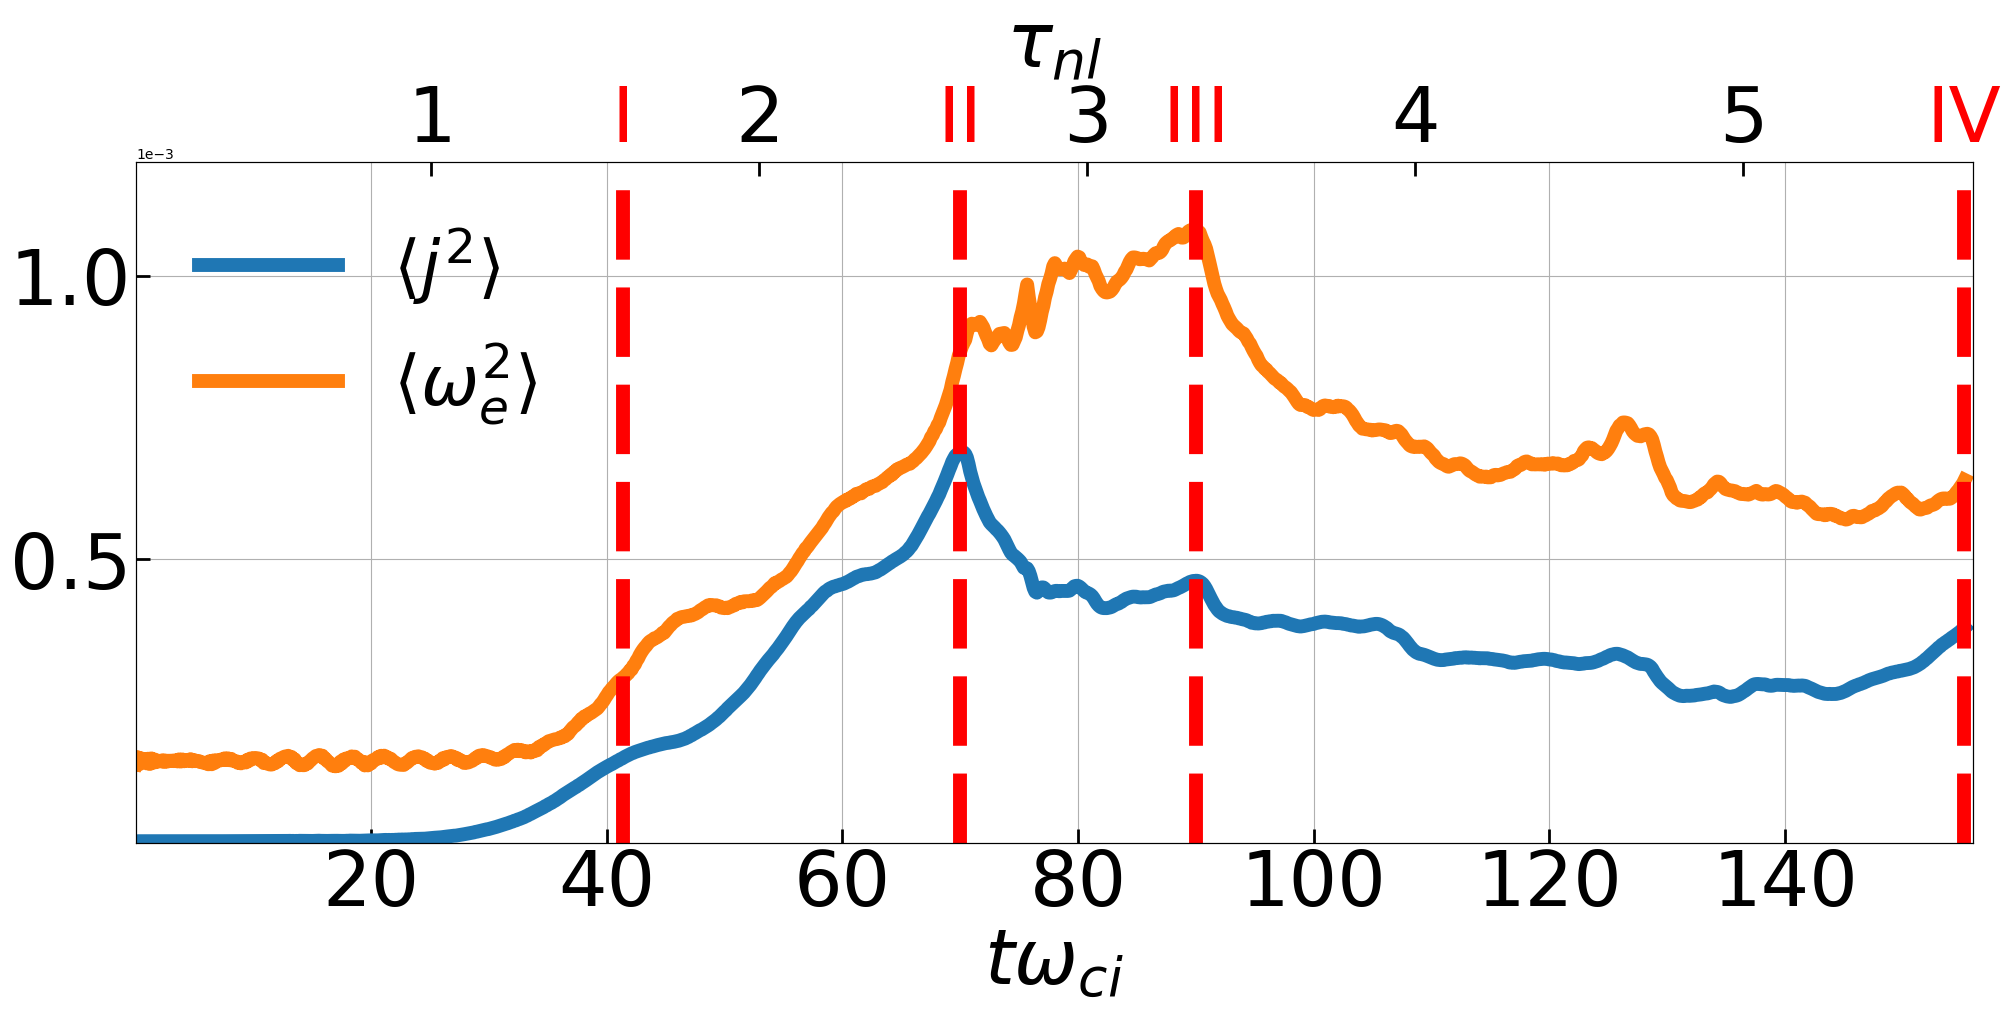

In [14]:
import matplotlib
fig, ax = plt.subplots(1,1, figsize=(20,10), layout='constrained')
mpl.rcParams['lines.linewidth'] = 10
# ax1.cla()
# axs[0].plot(twci, (jrms_t), marker = 'x',  label = r'$J_{rms}$')
ax.plot(twci, df['jrms']**2, label = r'$\langle j^2 \rangle$')
ax.plot(twci, df['ome'], label = r'$\langle \omega_e^2 \rangle $')
# ax.plot(twci, df['omi'], linewidth = 5, label = r'$\langle \omega_i^2 \rangle $')
# ax.plot(twci, df['ui2'], linewidth = 5, label = r'$\langle U_i^2 \rangle $')
# ax.plot(twci, df['ue2'], linewidth = 5, label = r'$\langle U_e^2 \rangle $')
# import matplotlib
# matplotlib.rc('font', size=30)
# axs[1].plot(twci, (drhoe_t - drhoe_t[0]),  label = r'$\delta \rho^e_{rms}$')
# axs[1].plot(twci, (drhoi_t - drhoi_t[0]),  label = r'$\delta \rho^i_{rms}$')
# axs.plot(twci, (drhoe_t - drhoi_t) - (drhoe_t - drhoi_t)[0], marker = 'x' , label = r'$\delta \rho_{rms}$' )
# axs[2].plot(twci, db_t - db_t[0] , label = r'$\delta B_{rms}$')
# axs[3].plot(twci, omz2e_av, label = r'$\langle \omega_{ze}^2 \rangle$')
# axs[3].plot(twci, omz2i_av, label = r'$\langle \omega_{zi}^2 \rangle$')
# axs[3].plot(twci, ome_t, marker = 'x', label = r'$\delta \omega^e_{ms}$')
# axs[3].plot(twci, omi_t, marker = 'x', label = r'$\delta \omega^i_{ms}$')
# for ax in axs:
txt = 55
trans = ax.get_xaxis_transform()


mpl.rcParams['lines.linestyle'] = 'solid'
plt.text(41.4, 1.03, 'I',color = 'red', transform=trans, ha = 'center', fontsize = txt)
plt.text(70, 1.03, 'II',color = 'red', transform=trans, ha = 'center', fontsize = txt)
plt.text(90, 1.03, 'III',color = 'red', transform=trans, ha = 'center', fontsize = txt)
plt.text(155.2, 1.03, 'IV',color = 'red', transform=trans, ha = 'center', fontsize = txt)

ax.axvline(41.4, color = 'red' , linestyle = (0, (5, 2)))
ax.axvline(70, color = 'red'   , linestyle = (0, (5, 2)))
ax.axvline(90, color = 'red'   , linestyle = (0, (5, 2)))
ax.axvline(155.2, color = 'red', linestyle = (0, (5, 2)))

ax.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
ax.legend(loc = 'upper left', fontsize = 50, frameon = False)
ax.tick_params(which='both', width=2, labelsize = txt, direction = 'in')
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', length=5 )
ax.set_xlabel(r'$ t \omega_{ci}$', size = txt)
ax.set_ylim(1e-6, 1.2e-3)
ax.set_xlim(0.1, 155.9)
ax.grid()
plt.rcParams.update({'font.size': 50})

ax1 = ax.twiny()

ax1.plot(tnl, np.zeros(len(twci)), alpha = 0)
ax1.tick_params(which='both', width=2, labelsize = txt, direction = 'in')
ax1.tick_params(which='major', length=10)
ax1.tick_params(which='minor', length=5 )
ax1.set_xlim(0.1, 5.7)
ax1.set_title(r'$ \tau_{nl}$', size = txt)

plt.savefig(figs + 'globals.png')

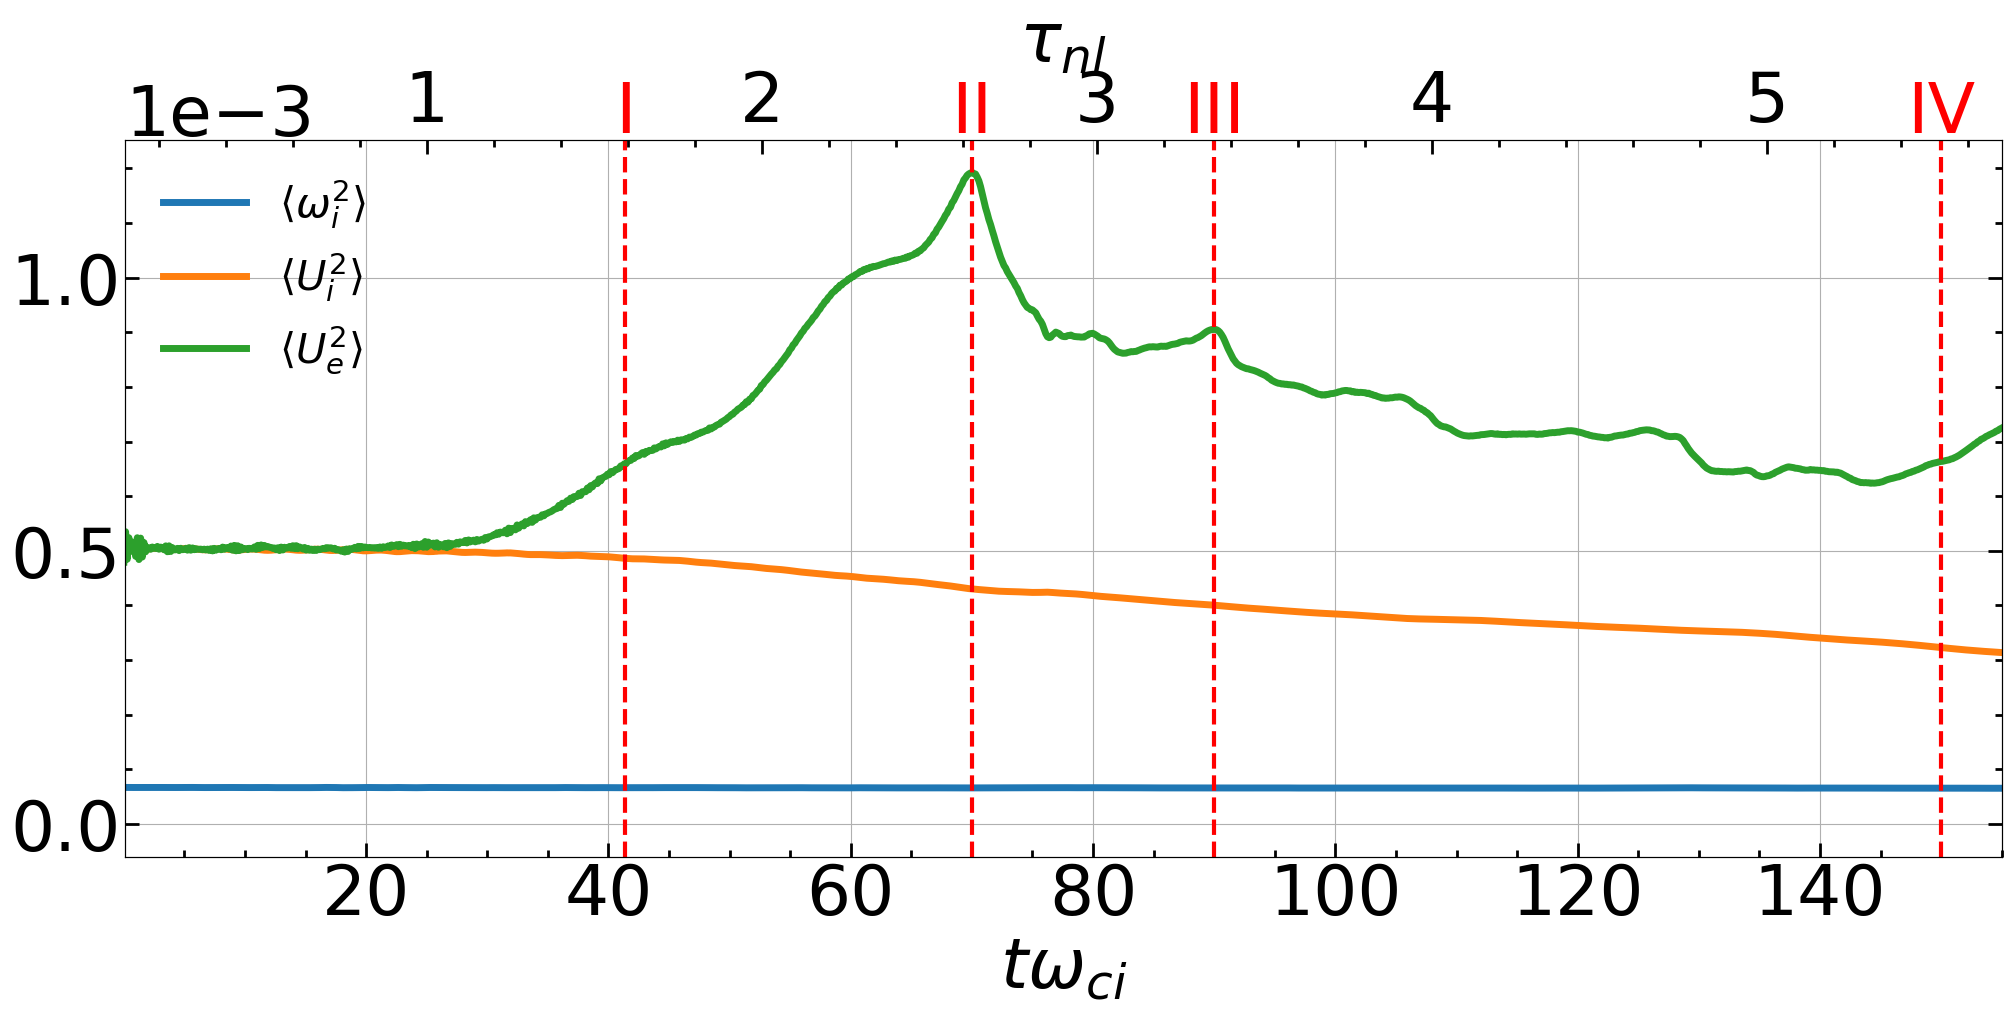

In [15]:
import matplotlib
fig, ax = plt.subplots(1,1, figsize=(20,10), layout='constrained')

# plt.rc('font', size=10)
# ax1.cla()
# axs[0].plot(twci, (jrms_t), marker = 'x',  label = r'$J_{rms}$')
# ax.plot(twci, df['jrms']**2, linewidth = 5, label = r'$\langle J^2 \rangle$')
# ax.plot(twci, df['ome'], linewidth = 5, label = r'$\langle \omega_e^2 \rangle$')
ax.plot(twci, df['omi'], linewidth = 5, label = r'$\langle \omega_i^2 \rangle$')
ax.plot(twci, df['ui2'], linewidth = 5, label = r'$\langle U_i^2 \rangle$')
ax.plot(twci, df['ue2'], linewidth = 5, label = r'$\langle U_e^2 \rangle$')
matplotlib.rc('font', size=30)
# axs[1].plot(twci, (drhoe_t - drhoe_t[0]),  label = r'$\delta \rho^e_{rms}$')
# axs[1].plot(twci, (drhoi_t - drhoi_t[0]),  label = r'$\delta \rho^i_{rms}$')
# axs.plot(twci, (drhoe_t - drhoi_t) - (drhoe_t - drhoi_t)[0], marker = 'x' , label = r'$\delta \rho_{rms}$' )
# axs[2].plot(twci, db_t - db_t[0] , label = r'$\delta B_{rms}$')
# axs[3].plot(twci, omz2e_av, label = r'$\langle \omega_{ze}^2 \rangle$')
# axs[3].plot(twci, omz2i_av, label = r'$\langle \omega_{zi}^2 \rangle$')
# axs[3].plot(twci, ome_t, marker = 'x', label = r'$\delta \omega^e_{ms}$')
# axs[3].plot(twci, omi_t, marker = 'x', label = r'$\delta \omega^i_{ms}$')
# for ax in axs:
txt = 50
trans = ax.get_xaxis_transform()
ax.axvline(41.4, color = 'red', linestyle = '--', linewidth = 3)
plt.text(41.4, 1.01, 'I',color = 'red', transform=trans, ha = 'center', fontsize = txt)
ax.axvline(70, color = 'red', linestyle = '--', linewidth = 3)
plt.text(70, 1.01, 'II',color = 'red', transform=trans, ha = 'center', fontsize = txt)
ax.axvline(90, color = 'red', linestyle = '--', linewidth = 3)
plt.text(90, 1.01, 'III',color = 'red', transform=trans, ha = 'center', fontsize = txt)
ax.axvline(150, color = 'red', linestyle = '--', linewidth = 3)
plt.text(150, 1.01, 'IV',color = 'red', transform=trans, ha = 'center', fontsize = txt)
ax.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
ax.legend(loc = 'upper left', fontsize = 30, frameon = False)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2, labelsize = txt, right = True, direction = 'in')
ax.tick_params(which='major', length=10, top = True, right =True)
ax.tick_params(which='minor', length=5 , top = True, right =True)
ax.grid()


ax1 = ax.twiny()

ax1.plot(np.linspace(0,3.89, len(twci)), np.zeros(len(twci)), alpha = 0)
ax1.tick_params(axis ='x') 
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2, labelsize = txt, right = True, direction = 'in')
ax1.tick_params(which='major', length=10, top = True, right =True)
ax1.tick_params(which='minor', length=5 , top = True, right =True)
# fig.supylabel(, size = 15)
# ax.set_ylim(6e-5, 7e-5 )
ax.set_xlim(0.1, 155)
ax1.set_xlim(0.1, 5.7)
ax1.set_xlabel(r'$ \tau_{nl}$', size = txt)
ax.set_xlabel(r'$ t \omega_{ci}$', size = txt)
plt.savefig(figs + 'wi.png', dpi = 400)

In [16]:
ps = pd.read_csv(data + 'PS_av.csv')

In [17]:
# import matplotlib
# fig, ax = plt.subplots(1,1, figsize=(20,10), layout='constrained')

# # plt.rc('font', size=10)
# # ax1.cla()
# # axs[0].plot(twci, (jrms_t), marker = 'x',  label = r'$J_{rms}$')
# ax.plot(twci, ps['pide'], linewidth = 3, label = r'$\langle PiD^e \rangle$')
# ax.plot(twci, ps['pidi'], linewidth = 3, label = r'$\langle PiD^i \rangle$')
# ax.plot(twci, ps['pthe'], linewidth = 3, label = r'$\langle p \theta^e \rangle$')
# ax.plot(twci, ps['pthi'], linewidth = 3, label = r'$\langle p \theta^i \rangle$')
# import matplotlib
# matplotlib.rc('font', size=30)
# # axs[1].plot(twci, (drhoe_t - drhoe_t[0]),  label = r'$\delta \rho^e_{rms}$')
# # axs[1].plot(twci, (drhoi_t - drhoi_t[0]),  label = r'$\delta \rho^i_{rms}$')
# # axs.plot(twci, (drhoe_t - drhoi_t) - (drhoe_t - drhoi_t)[0], marker = 'x' , label = r'$\delta \rho_{rms}$' )
# # axs[2].plot(twci, db_t - db_t[0] , label = r'$\delta B_{rms}$')
# # axs[3].plot(twci, omz2e_av, label = r'$\langle \omega_{ze}^2 \rangle$')
# # axs[3].plot(twci, omz2i_av, label = r'$\langle \omega_{zi}^2 \rangle$')
# # axs[3].plot(twci, ome_t, marker = 'x', label = r'$\delta \omega^e_{ms}$')
# # axs[3].plot(twci, omi_t, marker = 'x', label = r'$\delta \omega^i_{ms}$')
# # for ax in axs:
# txt = 35
# trans = ax.get_xaxis_transform()
# ax.axvline(41.4, color = 'red', linestyle = '--', linewidth = 3)

# ax.axvline(70, color = 'red', linestyle = '--', linewidth = 3)
# plt.text(41.4, 1.01, 'I',color = 'red', transform=trans, ha = 'center', fontsize = txt)
# plt.text(70, 1.01, 'II',color = 'red', transform=trans, ha = 'center', fontsize = txt)
# plt.text(90, 1.01, 'III',color = 'red', transform=trans, ha = 'center', fontsize = txt)
# plt.text(150,1.01, 'IV',color = 'red', transform=trans, ha = 'center', fontsize = txt)
# ax.axvline(90, color = 'red', linestyle = '--', linewidth = 3)

# ax.axvline(150, color = 'red', linestyle = '--', linewidth = 3)

# ax.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
# ax.legend(loc = 'upper left', fontsize = 30)
# ax.xaxis.set_minor_locator(AutoMinorLocator())
# ax.yaxis.set_minor_locator(AutoMinorLocator())
# ax.tick_params(which='both', width=2, labelsize = txt, right = True, direction = 'in')
# ax.tick_params(which='major', length=10, top = True, right =True)
# ax.tick_params(which='minor', length=5 , top = True, right =True)
# ax.grid()


# ax1 = ax.twiny()

# ax1.plot(tnl, np.zeros(len(twci)), alpha = 0)
# ax1.tick_params(axis ='x') 
# ax1.xaxis.set_minor_locator(AutoMinorLocator())
# ax1.yaxis.set_minor_locator(AutoMinorLocator())
# ax1.tick_params(which='both', width=2, labelsize = txt, right = True, direction = 'in')
# ax1.tick_params(which='major', length=10, top = True, right =True)
# ax1.tick_params(which='minor', length=5 , top = True, right =True)
# # fig.supylabel(, size = 15)
# ax.set_xlim(30, 155)
# ax.set_ylim(-2e-7, 7e-7)
# ax1.set_xlim(1.01, 5.7)
# ax1.set_xlabel(r'$ \tau_{nl}$', size = txt)
# ax.set_xlabel(r'$ t \omega_{ci}$', size = txt)
# plt.savefig(figs + 'PS_av.png', dpi = 400)

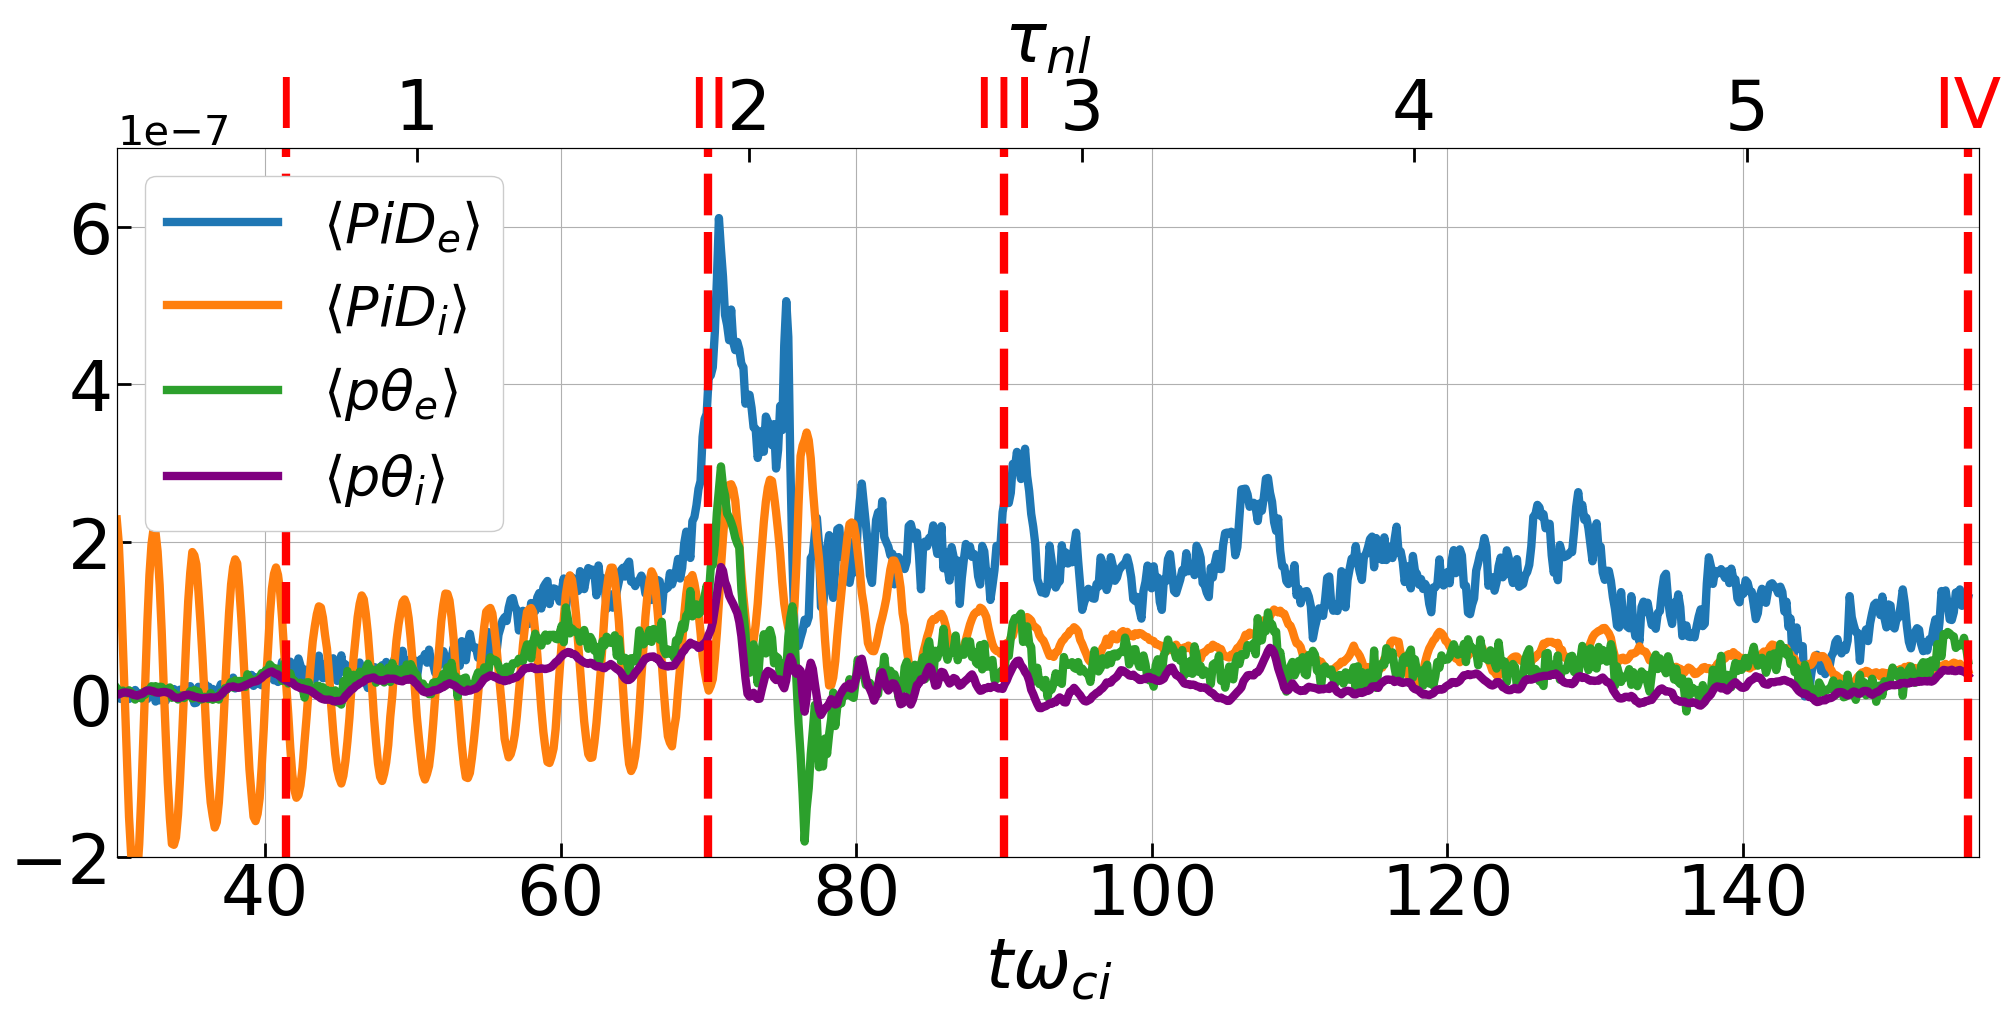

In [18]:
import matplotlib
fig, ax = plt.subplots(1,1, figsize=(20,10), layout='constrained')

mpl.rcParams.update({'lines.linewidth':6})

ax.plot(twci, ps['pide'], label = r'$\langle PiD_e \rangle$')
ax.plot(twci, ps['pidi'], label = r'$\langle PiD_i \rangle$')
ax.plot(twci, ps['pthe'], label = r'$\langle p \theta_e \rangle$')
ax.plot(twci, ps['pthi'], c = 'purple', label = r'$\langle p \theta_i \rangle$')
txt = 50
trans = ax.get_xaxis_transform()



plt.text(41.4, 1.03, 'I',color = 'red', transform=trans, ha = 'center', fontsize = txt)
plt.text(70, 1.03, 'II',color = 'red', transform=trans, ha = 'center', fontsize = txt)
plt.text(90, 1.03, 'III',color = 'red', transform=trans, ha = 'center', fontsize = txt)
plt.text(155.2, 1.03, 'IV',color = 'red', transform=trans, ha = 'center', fontsize = txt)

ax.axvline(41.4, color = 'red' , linestyle = (0, (5, 2)))
ax.axvline(70, color = 'red', linestyle = (0, (5, 2)))
ax.axvline(90, color = 'red', linestyle = (0, (5, 2)))
ax.axvline(155.2, color = 'red', linestyle = (0, (5, 2)))

ax.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
ax.legend(loc = 'upper left', fontsize = 40, framealpha = 1)
ax.tick_params(which='both', width=2, labelsize = txt, direction = 'in')
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', length=5 )
ax.set_xlabel(r'$ t \omega_{ci}$', size = txt)
ax.set_ylim(-2e-7, 7e-7)
ax.set_xlim(30, 156)
ax.grid()
plt.rcParams.update({'font.size': 40})

ax1 = ax.twiny()

ax1.plot(tnl, np.zeros(len(twci)), alpha = 0)
ax1.tick_params(which='both', width=2, labelsize = txt, direction = 'in')
ax1.tick_params(which='major', length=10)
ax1.tick_params(which='minor', length=5 )
ax1.set_xlim(0.1, 5.7)
ax1.set_title(r'$ \tau_{nl}$', size = txt)

plt.savefig(figs + 'ps_av.png')

In [19]:
dt = info['dt*wpe']
psi_int = sci.integrate.cumulative_simpson((ps['pidi'] + ps['pthi']) * dt, initial = 0)

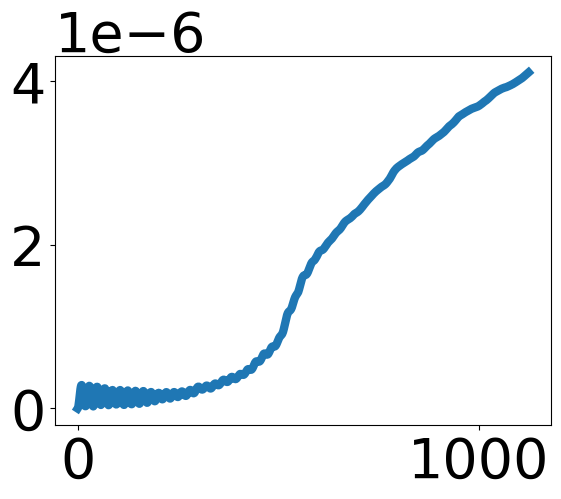

In [20]:
plt.plot(psi_int)

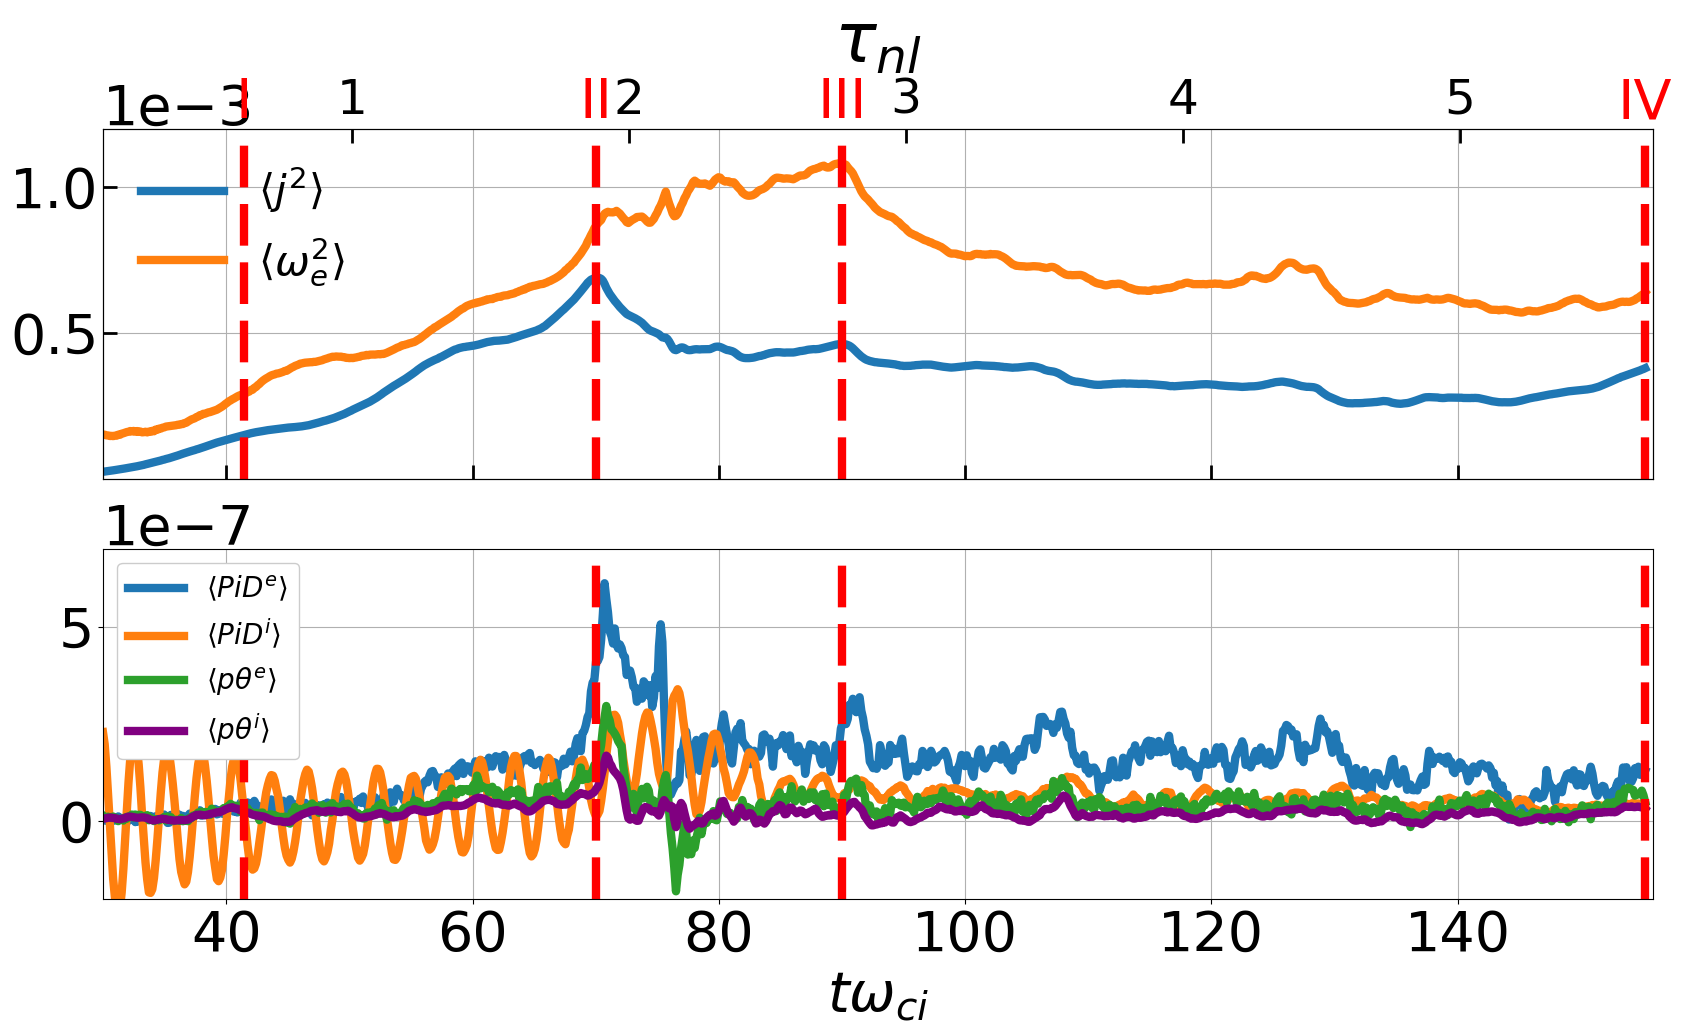

In [21]:
import matplotlib
fig, ax = plt.subplots(2,1, figsize=(20,10), sharex = True)
mpl.rcParams['lines.linewidth'] = 6
ax[0].plot(twci, df['jrms']**2, label = r'$\langle j^2 \rangle$')
ax[0].plot(twci, df['ome'], label = r'$\langle \omega_e^2 \rangle $')


ax[1].plot(twci, ps['pide'], label = r'$\langle PiD^e \rangle$')
ax[1].plot(twci, ps['pidi'], label = r'$\langle PiD^i \rangle$')
ax[1].plot(twci, ps['pthe'], label = r'$\langle p \theta^e \rangle$')
ax[1].plot(twci, ps['pthi'], c = 'purple', label = r'$\langle p \theta^i \rangle$')
txt = 50
trans = ax[0].get_xaxis_transform()


mpl.rcParams['lines.linestyle'] = 'solid'
plt.text(41.4, 1.03, 'I',color = 'red', transform=trans, ha = 'center')
plt.text(70, 1.03, 'II',color = 'red', transform=trans, ha = 'center')
plt.text(90, 1.03, 'III',color = 'red', transform=trans, ha = 'center')
plt.text(155.2, 1.03, 'IV',color = 'red', transform=trans, ha = 'center')

ax[0].axvline(41.4, color = 'red' , linestyle = (0, (5, 2)))
ax[0].axvline(70, color = 'red'   , linestyle = (0, (5, 2)))
ax[0].axvline(90, color = 'red'   , linestyle = (0, (5, 2)))
ax[0].axvline(155.2, color = 'red', linestyle = (0, (5, 2)))

ax[1].axvline(41.4, color = 'red' , linestyle = (0, (5, 2)))
ax[1].axvline(70, color = 'red'   , linestyle = (0, (5, 2)))
ax[1].axvline(90, color = 'red'   , linestyle = (0, (5, 2)))
ax[1].axvline(155.2, color = 'red', linestyle = (0, (5, 2)))

ax[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
ax[0].legend(loc = 'upper left', fontsize = 30, frameon = False)
ax[0].tick_params(which='both', width=2, direction = 'in')
ax[0].tick_params(which='major', length=10)
ax[0].tick_params(which='minor', length=5 )
ax[1].set_xlabel(r'$ t \omega_{ci}$')
ax[0].set_ylim(1e-6, 1.2e-3)
ax[0].set_xlim(30, 155.9)
ax[0].grid()
ax[1].grid()
plt.rcParams.update({'font.size': 35})

ax[1].legend(loc = 'upper left', fontsize = 20, framealpha = 1)

ax[1].set_ylim(-2e-7, 7e-7)

ax1 = ax[0].twiny()

ax1.plot(tnl, np.zeros(len(twci)), alpha = 0)
ax1.tick_params(which='both', width=2, direction = 'in')
ax1.tick_params(which='major', length=10)
ax1.tick_params(which='minor', length=5 )
ax1.set_xlim(0.1, 5.7)
ax1.set_title(r'$ \tau_{nl}$', size = txt)

plt.savefig(figs + 'j_PS.png')